In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("../datasets/deliveries.csv")
df_copy=df

In [10]:
df.head()
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [11]:
columns_to_keep = ['match_id', 'venue','batting_team', 'bowling_team','striker', 'bowler', 'runs_off_bat','extras','wicket_type']
df_selected = df[columns_to_keep]

In [12]:
selected_entries = df_selected[df['bowler'] == 'TA Boult']

df_bowler = pd.DataFrame(selected_entries)

df_bowler.reset_index(drop=True, inplace=True)
df_bowler

,match_id,venue,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type
0,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN
1,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,6,0,NaN
2,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,1,0,NaN
3,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,DJ Malan,TA Boult,1,0,NaN
4,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,4,0,NaN
...,...,...,...,...,...,...,...,...,...
397,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TA Boult,4,0,NaN
398,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TA Boult,1,0,NaN
399,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,H Klaasen,TA Boult,1,0,NaN
400,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TA Boult,1,0,NaN


In [13]:
match_id_column = 'match_id'
batting_team_column = 'batting_team'
bowling_team_column = 'bowling_team'
striker_column = 'striker'
bowler_column = 'bowler'
runs_off_bat_column = 'runs_off_bat'
extras_column = 'extras'

unique_bowlers = df[bowler_column].unique()
bowler_data = {}
for bowler in unique_bowlers:
    bowler_data[bowler] = df[df[bowler_column] == bowler][[match_id_column, batting_team_column, bowling_team_column, striker_column, bowler_column, runs_off_bat_column, extras_column]]

# Access the data for a specific bowler (replace 'BowlerName' with the actual bowler name)
specific_bowler_data = bowler_data.get('TA Boult', pd.DataFrame())

# If you want to reset the index of each bowler's DataFrame
for bowler, data in bowler_data.items():
    data.reset_index(drop=True, inplace=True)

# Display the data for a specific bowler
print(specific_bowler_data)

     match_id  batting_team bowling_team      striker    bowler  runs_off_bat   
0           1       England  New Zealand  JM Bairstow  TA Boult             0  \
1           1       England  New Zealand  JM Bairstow  TA Boult             6   
2           1       England  New Zealand  JM Bairstow  TA Boult             1   
3           1       England  New Zealand     DJ Malan  TA Boult             1   
4           1       England  New Zealand  JM Bairstow  TA Boult             4   
..        ...           ...          ...          ...       ...           ...   
397        32  South Africa  New Zealand    DA Miller  TA Boult             4   
398        32  South Africa  New Zealand    DA Miller  TA Boult             1   
399        32  South Africa  New Zealand    H Klaasen  TA Boult             1   
400        32  South Africa  New Zealand    DA Miller  TA Boult             1   
401        32  South Africa  New Zealand    H Klaasen  TA Boult             6   

     extras  
0         0  

In [14]:
#Scraping batsman data
from bs4 import BeautifulSoup
import requests
url = 'https://www.espncricinfo.com/records/tournament/bowling-best-career-economy-rate/icc-cricket-world-cup-2023-24-15338'
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

x = soup.find_all('table')[0]
# print(len(x))
y = x.find_all('tr')
df_economy = []
for i in y:
  temp = []
  for j in i.find_all('td'):
    #  print(j.text,end=" ")
    temp.append(j.text)
  df_economy.append(temp)
df_economy=pd.DataFrame(df_economy)

def extract_first_two_words(text):
    words = text.split()
    return ' '.join(words[:2])
df_economy.columns = df_economy.iloc[0]
df_economy = df_economy.reindex(df_economy.index.drop(0))

# # Apply the function to the specified column
df_economy['Player'] = df_economy['Player'].apply(lambda x: extract_first_two_words(x))
merged_df = pd.merge(df_selected, df_economy, left_on='bowler', right_on='Player', how='inner')
merged_df = merged_df.drop(columns = ['Player','Span'])

merged_df = merged_df.rename(columns={'Ave':'Ave_bowl' , 'Runs':'Runs_given','SR':'SR_bowl','Mat':'Mat_bowl'})
merged_df


,match_id,venue,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type,Mat_bowl,...,Balls,Runs_given,Wkts,BBI,Ave_bowl,Econ,SR_bowl,4,5,10
0,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,546,504,14,3/37,36.00,5.53,39.0,-,-,-
1,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,6,0,NaN,10,...,546,504,14,3/37,36.00,5.53,39.0,-,-,-
2,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,1,0,NaN,10,...,546,504,14,3/37,36.00,5.53,39.0,-,-,-
3,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,DJ Malan,TA Boult,1,0,NaN,10,...,546,504,14,3/37,36.00,5.53,39.0,-,-,-
4,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,4,0,NaN,10,...,546,504,14,3/37,36.00,5.53,39.0,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14508,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,H Klaasen,TG Southee,1,0,NaN,4,...,198,256,7,3/100,36.57,7.75,28.2,-,-,-
14509,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TG Southee,6,0,NaN,4,...,198,256,7,3/100,36.57,7.75,28.2,-,-,-
14510,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TG Southee,0,0,NaN,4,...,198,256,7,3/100,36.57,7.75,28.2,-,-,-
14511,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TG Southee,1,0,NaN,4,...,198,256,7,3/100,36.57,7.75,28.2,-,-,-


In [15]:
url = 'https://www.espncricinfo.com/records/tournament/batting-highest-career-batting-average/icc-cricket-world-cup-2023-24-15338'

response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

x = soup.find_all('table')[0]
# print(len(x))
y = x.find_all('tr')
df_batsman = []
for i in y:
  temp = []
  for j in i.find_all('td'):
    #  print(j.text,end=" ")
    temp.append(j.text)
  df_batsman.append(temp)
df_batsman=pd.DataFrame(df_batsman)

def extract_first_two_words(text):
    words = text.split()
    return ' '.join(words[:2])
df_batsman.columns = df_batsman.iloc[0]
df_batsman = df_batsman.reindex(df_batsman.index.drop(0))
# # # Apply the function to the specified column
df_batsman['Player'] = df_batsman['Player'].apply(lambda x: extract_first_two_words(x))
merged_df = pd.merge(merged_df, df_batsman, left_on='striker', right_on='Player', how='inner')
merged_df = merged_df.drop(columns = ['Player','Span'])
merged_df
# df_batsman

,match_id,venue,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type,Mat_bowl,...,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
1,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,6,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
2,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,1,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
3,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,4,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
4,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11223,5,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,C Green,RA Jadeja,0,0,NaN,11,...,63,47,21.00,83,75.90,-,-,-,6,0
11224,5,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,C Green,RA Jadeja,1,0,NaN,11,...,63,47,21.00,83,75.90,-,-,-,6,0
11225,5,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,C Green,RA Jadeja,1,0,NaN,11,...,63,47,21.00,83,75.90,-,-,-,6,0
11226,5,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,C Green,RA Jadeja,0,0,NaN,11,...,63,47,21.00,83,75.90,-,-,-,6,0


In [16]:
merged_df.to_csv('output.csv', index=False)

In [17]:
# # Assuming your dataset is stored in a DataFrame named 'df'
# # You can load your dataset using pd.read_csv or another appropriate method
team1 = 'New Zealand'
team2 = 'India'
# Extract data for the specific match between IND and AUS
# a_vs_b_match = merged_df[(merged_df['batting_team'].isin([team1, team2])) & (merged_df['bowling_team'].isin([team1, team2]))]

# Create a binary column 'is_dot_ball' indicating whether the run_off_bat is 0 (dot ball) or not
merged_df['is_dot_ball'] = (merged_df['runs_off_bat'] == 0)
dot_balls_count = merged_df.groupby('bowler')['is_dot_ball'].sum().reset_index()
dot_balls_count =  dot_balls_count.rename(columns = {'bowler':'temp', 'is_dot_ball':'dots'})
dot_balls_count
merged_df = pd.merge(merged_df, dot_balls_count, left_on='bowler', right_on='temp', how='inner')
merged_df = merged_df.drop(columns='temp')

EDA

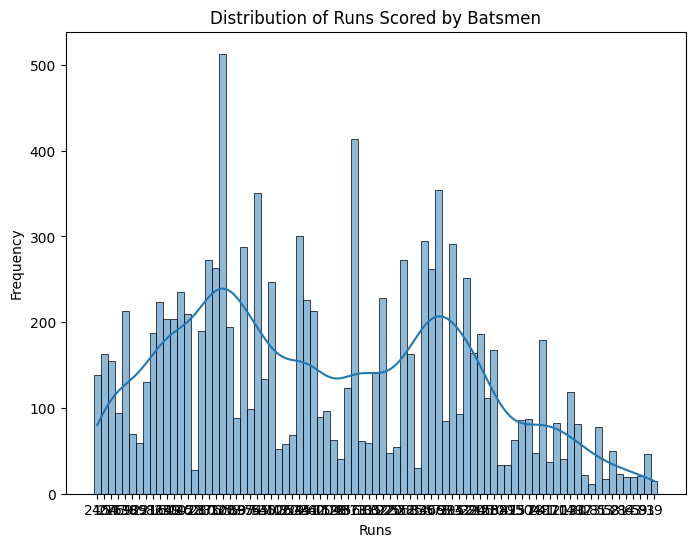

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(merged_df['Runs'], bins=20, kde=True)
plt.title('Distribution of Runs Scored by Batsmen')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()



In [19]:
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix,annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Narendra Modi Stadium, Ahmedabad'

In [21]:
merged_df

,match_id,venue,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type,Mat_bowl,...,Ave,BF,SR,100,50,0,4s,6s,is_dot_ball,dots
0,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,True,167
1,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,6,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,False,167
2,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,1,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,False,167
3,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,4,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,False,167
4,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,True,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11223,8,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Pakistan,Sri Lanka,Mohammad Rizwan,KIC Asalanka,1,0,NaN,9,...,65.83,414,95.41,1,1,-,38,5,False,1
11224,8,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Pakistan,Sri Lanka,Abdullah Shafique,KIC Asalanka,1,0,NaN,9,...,42.00,360,93.33,1,3,1,36,9,False,1
11225,8,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Pakistan,Sri Lanka,Abdullah Shafique,KIC Asalanka,4,0,NaN,9,...,42.00,360,93.33,1,3,1,36,9,False,1
11226,8,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Pakistan,Sri Lanka,Abdullah Shafique,KIC Asalanka,2,0,NaN,9,...,42.00,360,93.33,1,3,1,36,9,False,1


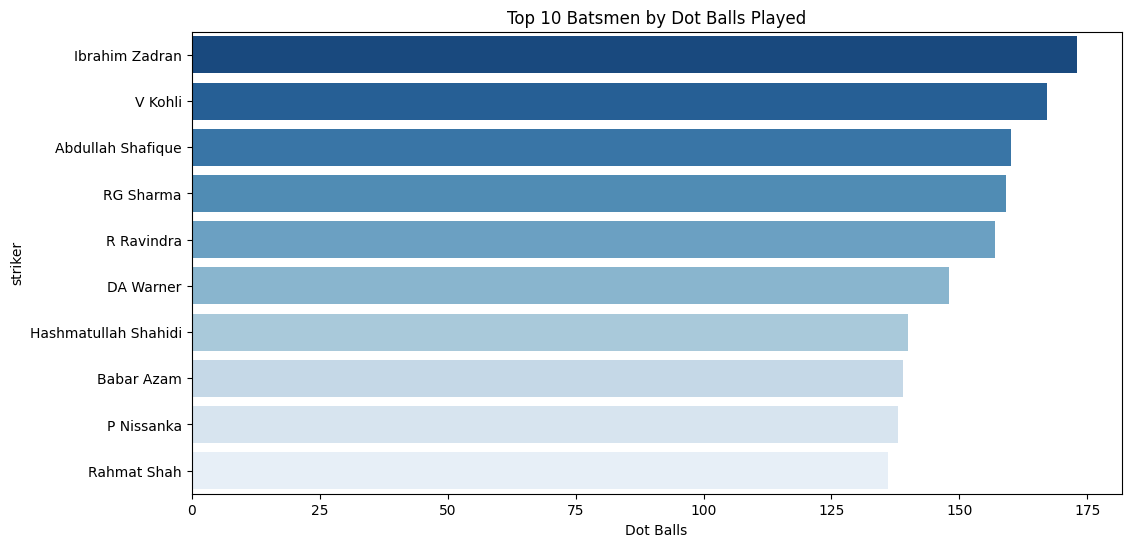

In [22]:
dot_balls_per_batsman = merged_df.groupby('striker')['is_dot_ball'].sum().reset_index()
dot_balls_per_batsman = dot_balls_per_batsman.sort_values('is_dot_ball', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='is_dot_ball', y='striker', data=dot_balls_per_batsman.head(10), palette='Blues_r')
plt.title('Top 10 Batsmen by Dot Balls Played')
plt.xlabel('Dot Balls')
plt.ylabel('striker')
plt.show()


In [23]:
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix,annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Narendra Modi Stadium, Ahmedabad'

In [24]:
dot_balls_count = merged_df.groupby('bowler')['is_dot_ball'].sum().reset_index()

dot_balls_count = dot_balls_count.rename(columns = { 'is_dot_ball' : 'dots_count'})
# final_df = pd.merge(dot_balls_count,merged_df,left_on='bowler2',right_on='bowler',how = 'inner')
final_df = pd.merge(dot_balls_count,merged_df,on='bowler')
dot_balls_count

,bowler,dots_count
0,A Dutt,143
1,A Zampa,79
2,AAP Atkinson,25
3,AD Mathews,25
4,AK Markram,12
...,...,...
75,TG Southee,1
76,Taskin Ahmed,114
77,Usama Mir,67
78,V Kohli,0


In [25]:
df_economy

,Player,Span,Mat,Overs,Mdns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5,10
1,R Ashwin,2023-2023,1,10.0,1,60,34,1,1/34,34.00,3.40,60.0,-,-,-
2,JJ Bumrah,2023-2023,11,91.5,9,551,373,20,4/39,18.65,4.06,27.5,1,-,-
3,Mohammad Nabi,2023-2023,9,61.3,4,369,254,8,3/28,31.75,4.13,46.1,-,-,-
4,KA Maharaj,2023-2023,10,89.0,1,534,370,15,4/46,24.66,4.15,35.6,1,-,-
5,RA Jadeja,2023-2023,11,93.3,4,561,398,16,5/33,24.87,4.25,35.0,-,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Agha Salman,2023-2023,3,5.0,-,30,46,-,-,-,9.20,-,-,-,-
97,Hasan Mahmud,2023-2023,2,14.0,-,84,132,3,2/67,44.00,9.42,28.0,-,-,-
98,M Pathirana,2023-2023,2,19.0,-,114,185,2,1/90,92.50,9.73,57.0,-,-,-
99,KIC Asalanka,2023-2023,9,1.0,-,6,10,-,-,-,10.00,-,-,-,-


In [26]:
final_df = pd.merge(dot_balls_count,df_economy,left_on='bowler',right_on='Player',how='inner')
final_df = final_df.astype(int, errors='ignore')
final_df = final_df.replace('-',0)


In [27]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
le = LabelEncoder()
df_transformed = df
for column in df_transformed.columns:
    if df_transformed[column].dtype == 'object':
        df_transformed[column] = le.fit_transform(df_transformed[column])

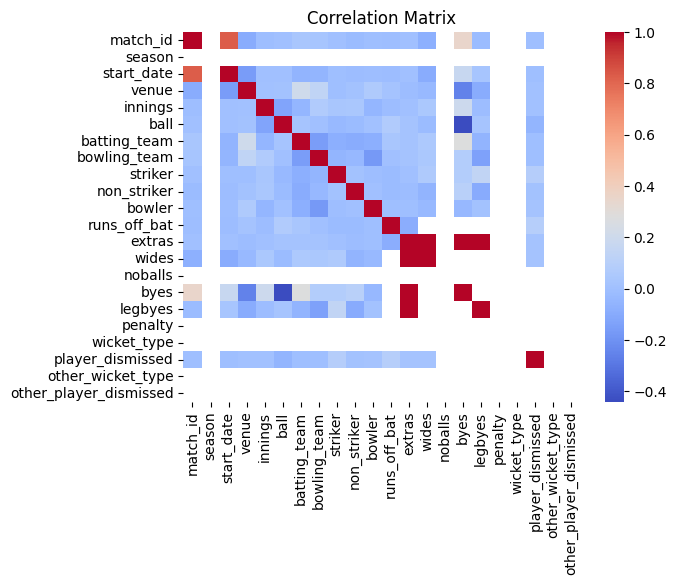

In [28]:
corr_matrix = df_transformed.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


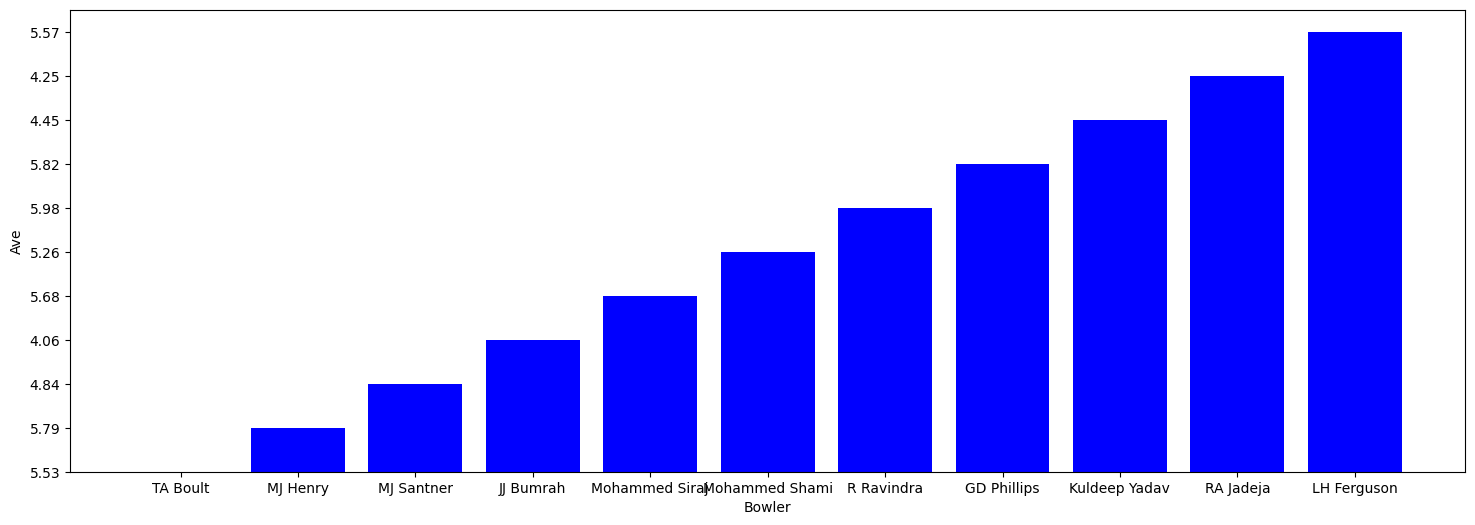

In [29]:
df_economy
team1 = 'New Zealand'
team2 = 'India'
# Extract data for the specific match between IND and AUS
a_vs_b_match = merged_df[(merged_df['batting_team'].isin([team1, team2])) & (merged_df['bowling_team'].isin([team1, team2]))]
df_unique = a_vs_b_match.drop_duplicates(subset=['bowler'])
df_unique
plt.figure(figsize=(18, 6))
plt.bar(df_unique['bowler'], df_unique['Econ'], color='blue')

# Add labels and title
plt.xlabel('Bowler')
plt.ylabel('Ave')
# Show the plot
plt.show()

In [30]:
dot_balls_count = merged_df.groupby('striker')['is_dot_ball'].sum().reset_index()

dot_balls_count = dot_balls_count.rename(columns = { 'is_dot_ball' : 'dots_count'})


In [31]:
final_df_batsman = pd.merge(dot_balls_count,df_batsman,left_on='striker',right_on='Player',how='inner')
final_df_batsman = final_df_batsman.astype(int, errors='ignore')
final_df_batsman = final_df_batsman.replace('-',0)
final_df_batsman

,striker,dots_count,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,A Zampa,29,A Zampa,2023-2023,11,6,3,48,29,16.00,60,80.00,0,0,1,5,0
1,AAP Atkinson,10,AAP Atkinson,2023-2023,3,3,1,37,35,18.50,23,160.86,0,0,1,7,0
2,AK Markram,100,AK Markram,2023-2023,10,10,1,406,106,45.11,366,110.92,1,3,0,44,9
3,AT Nidamanuru,59,AT Nidamanuru,2023-2023,7,7,1,164,54,27.33,167,98.20,0,1,0,11,10
4,AU Rashid,37,AU Rashid,2023-2023,9,9,3,92,20,15.33,91,101.09,0,0,0,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Towhid Hridoy,70,Towhid Hridoy,2023-2023,7,6,1,164,74,32.80,210,78.09,0,1,0,7,5
82,V Kohli,167,V Kohli,2023-2023,11,11,3,765,117,95.62,847,90.31,3,6,1,68,9
83,Vikramjit Singh,90,Vikramjit Singh,2023-2023,6,6,0,98,52,16.33,150,65.33,0,1,0,12,1
84,W Barresi,21,W Barresi,2023-2023,4,4,0,83,41,20.75,112,74.10,0,0,0,11,1


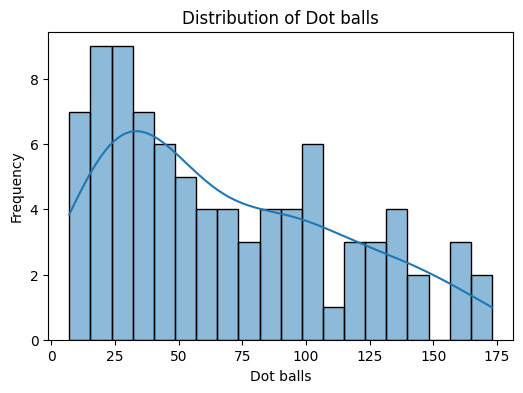

In [32]:
plt.figure(figsize=(6, 4))
sns.histplot(final_df_batsman['dots_count'], bins=20, kde=True)
plt.title('Distribution of Dot balls')
plt.xlabel('Dot balls')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='dots_count'>

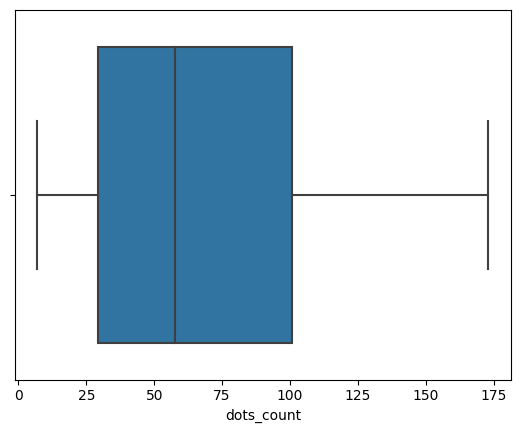

In [33]:
sns.boxplot(x=final_df_batsman['dots_count'], data=final_df_batsman)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score

features = ['Mat','50','Runs','NO','Ave','BF','4s','dots_count']
data = final_df_batsman[features]


X_train, X_test, y_train, y_test = train_test_split(data.drop('dots_count', axis=1), data['dots_count'], test_size=0.2, random_state=42)

# Train a RandomForestRegressor (since it's a regression problem)
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) instead of accuracy
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
r_squared = r2_score(y_test, y_pred)
print(f"R2 score: {r_squared}")


regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) instead of accuracy
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
r_squared = r2_score(y_test, y_pred)
print(f"R2 score: {r_squared}")

import pickle
pickle_rfc = open("most_dots_batsman.pkl","wb")
pickle.dump(regressor, pickle_rfc)
pickle_rfc.close()


Mean Absolute Error: 18.095000000000002
R2 score: 0.6909531532581161
Mean Absolute Error: 18.979623890226563
R2 score: 0.6643555811787725


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_grid,
                                   n_iter=100, scoring='neg_mean_absolute_error',
                                   cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_score = random_search.best_score_
best_regressor = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_regressor.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) and R2 score
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Save the best RandomForestRegressor model using pickle
with open("best_rfc_model.pkl", "wb") as pickle_rfc:
    pickle.dump(best_regressor, pickle_rfc)

print(f"Best Parameters: {best_params}")
print(f"Best Mean Absolute Error: {-best_score}")

print(f"RandomForestRegressor - Mean Absolute Error: {mae}")
print(f"RandomForestRegressor - R2 score: {r_squared}")



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Best Mean Absolute Error: 17.914764676791457
RandomForestRegressor - Mean Absolute Error: 18.90609696168029
RandomForestRegressor - R2 score: 0.6826187300927203


In [37]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("dot_batsman.pkl","wb")
pickle.dump(regressor, pickle_out)
#Serialization
pickle_out.close()